In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
file_path = "C:/Users/svelo/Downloads/Amazon Sales data.csv"
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Show the first few rows of the dataset
print("\nFirst Few Rows of the Dataset:")
print(data.head())

# Check for missing values
print("\nMissing Values in the Dataset:")
print(data.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB
None

First Few Rows of the Dataset:
                              Region                Cou

In [3]:
# Fill missing values if any
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce')
data.fillna({'Order Priority': 'Not Specified'}, inplace=True)

# Create new columns for analysis
data['Order Month'] = data['Order Date'].dt.to_period('M').astype(str)
data['Order Year'] = data['Order Date'].dt.year
data['Order YearMonth'] = data['Order Date'].dt.to_period('M').astype(str)


In [4]:
# Calculate total revenue, cost, and profit by month and year
monthly_sales = data.groupby('Order Month').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()

yearly_sales = data.groupby('Order Year').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()

yearly_monthly_sales = data.groupby('Order YearMonth').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()

# Key metrics
key_metrics = {
    'Total Revenue': data['Total Revenue'].sum(),
    'Total Cost': data['Total Cost'].sum(),
    'Total Profit': data['Total Profit'].sum(),
    'Average Profit Margin': data['Total Profit'].sum() / data['Total Revenue'].sum() * 100
}

print("\nKey Metrics:")
for key, value in key_metrics.items():
    print(f"{key}: {value:.2f}")



Key Metrics:
Total Revenue: 137348768.31
Total Cost: 93180569.91
Total Profit: 44168198.40
Average Profit Margin: 32.16


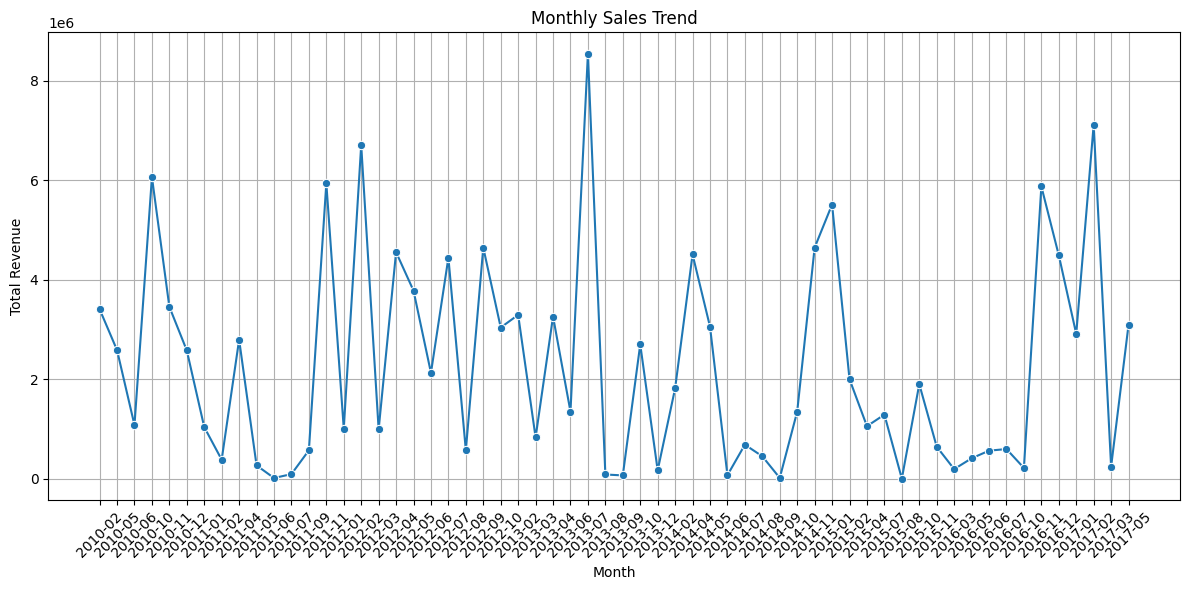

C:\Users\svelo\AppData\Local\Temp\ipykernel_16492\1900800407.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Year', y='Total Revenue', data=yearly_sales, palette='viridis')


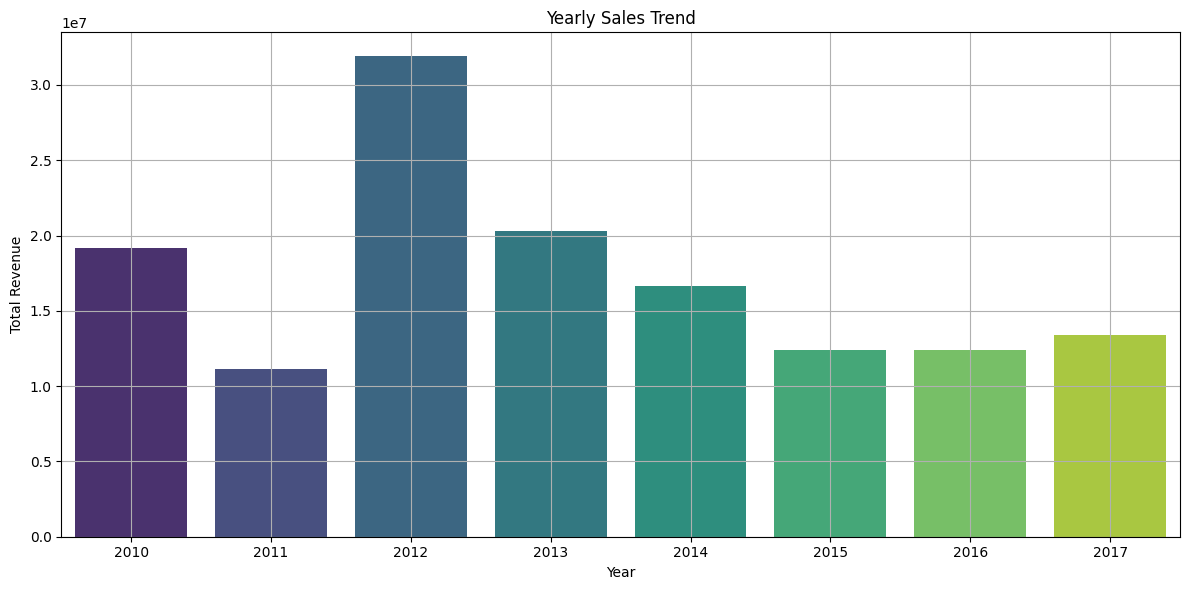

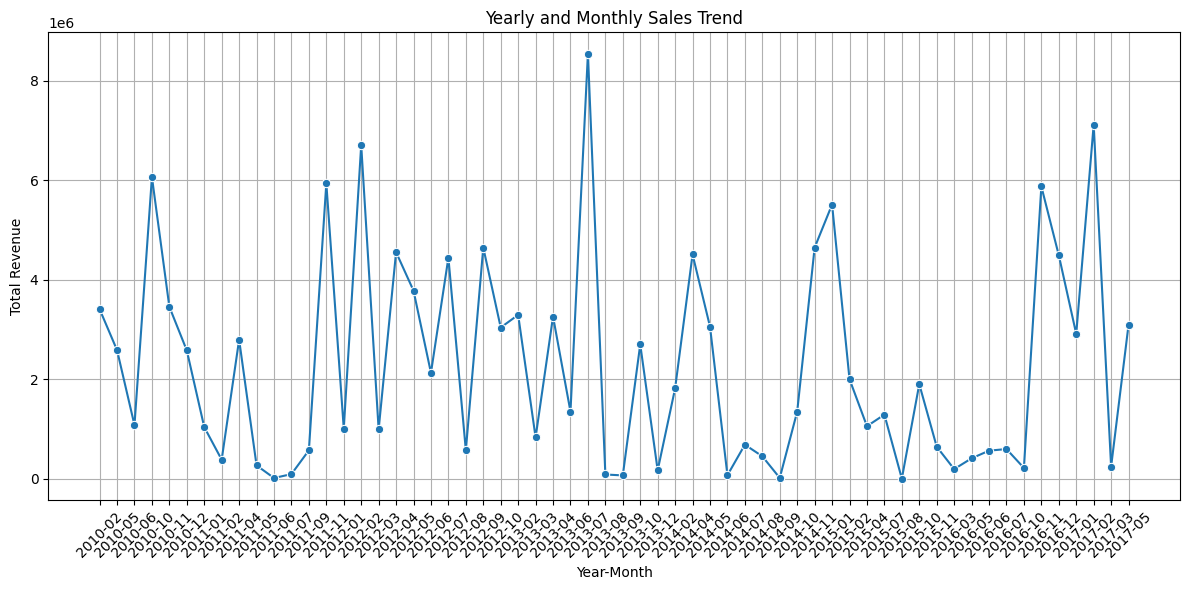

In [5]:
# Monthly Sales Trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Month', y='Total Revenue', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Yearly Sales Trend
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Year', y='Total Revenue', data=yearly_sales, palette='viridis')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

# Yearly and Monthly Sales Trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order YearMonth', y='Total Revenue', data=yearly_monthly_sales, marker='o')
plt.title('Yearly and Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\svelo\AppData\Local\Temp\ipykernel_16492\1267688090.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales Channel', y='Total Revenue', data=data, estimator='sum', palette='viridis')


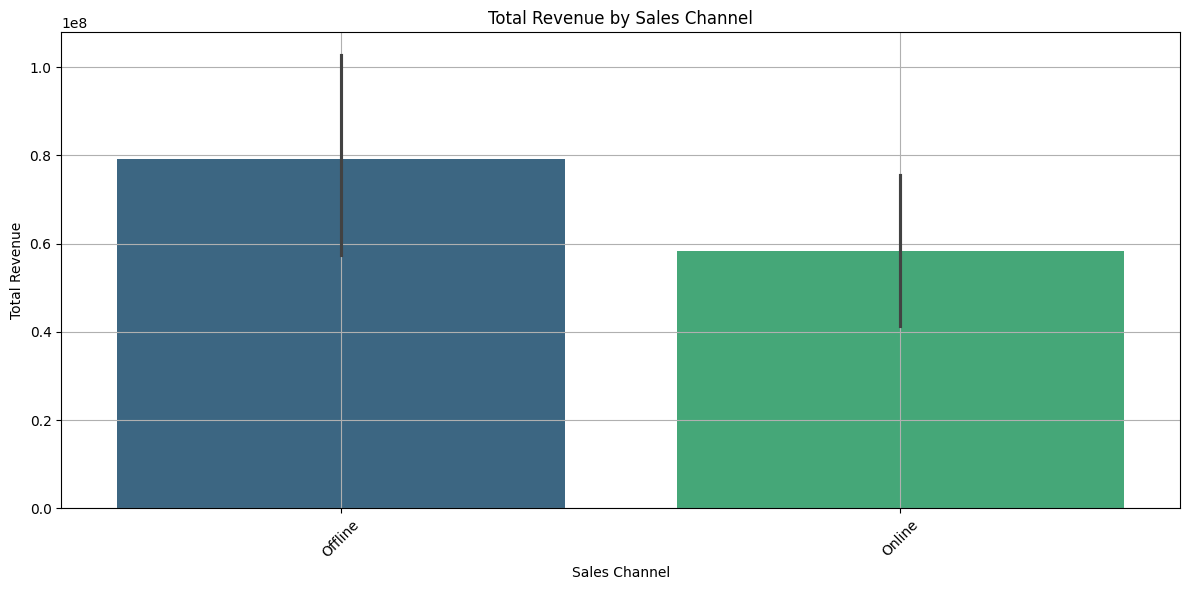

C:\Users\svelo\AppData\Local\Temp\ipykernel_16492\1267688090.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Total Profit', data=data, palette='viridis')


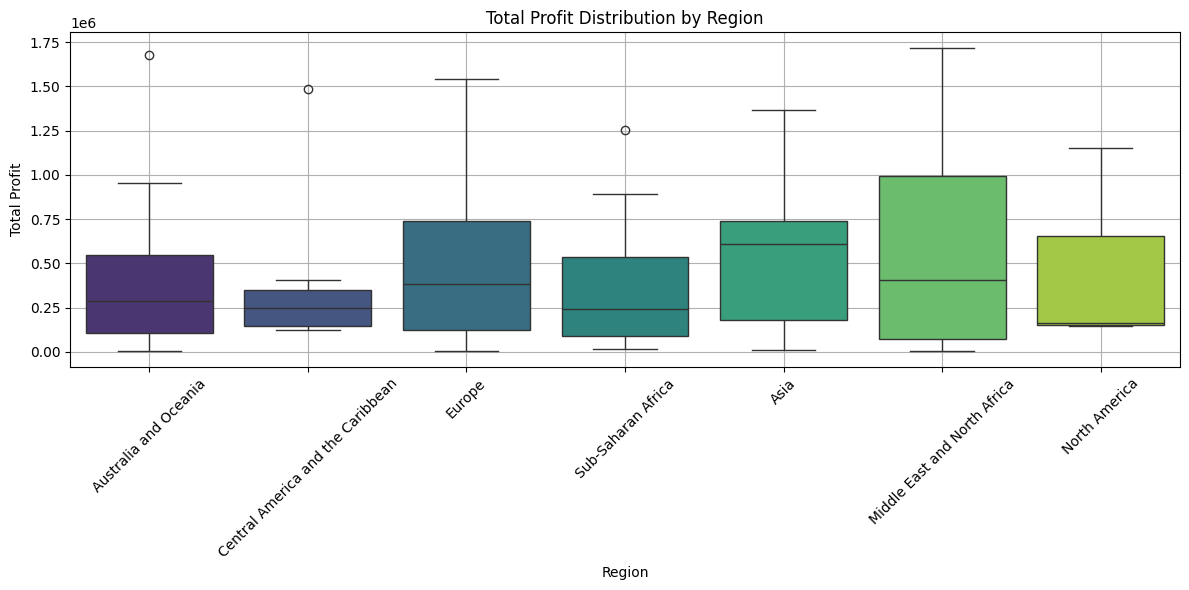

C:\Users\svelo\AppData\Local\Temp\ipykernel_16492\1267688090.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Type', y='Total Profit', data=data, estimator='sum', palette='viridis')


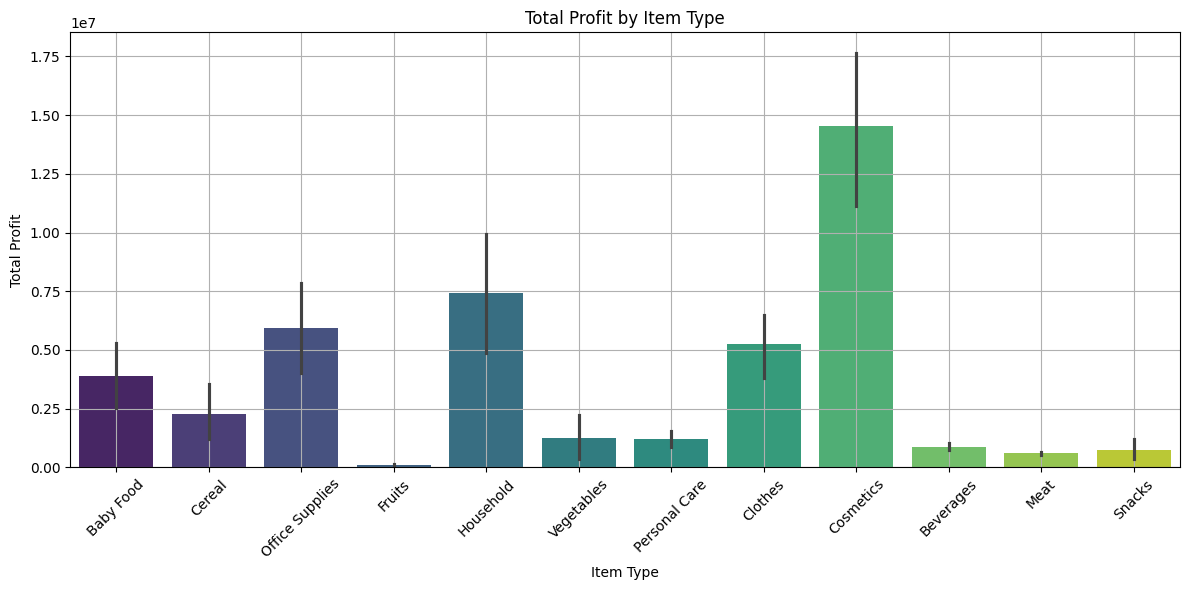

In [6]:
# Sales Channel and Total Revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales Channel', y='Total Revenue', data=data, estimator='sum', palette='viridis')
plt.title('Total Revenue by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Region and Total Profit
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Total Profit', data=data, palette='viridis')
plt.title('Total Profit Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Item Type and Total Profit
plt.figure(figsize=(12, 6))
sns.barplot(x='Item Type', y='Total Profit', data=data, estimator='sum', palette='viridis')
plt.title('Total Profit by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\svelo\AppData\Local\Temp\ipykernel_16492\3841740966.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_labels, y=metrics_values, palette='viridis')


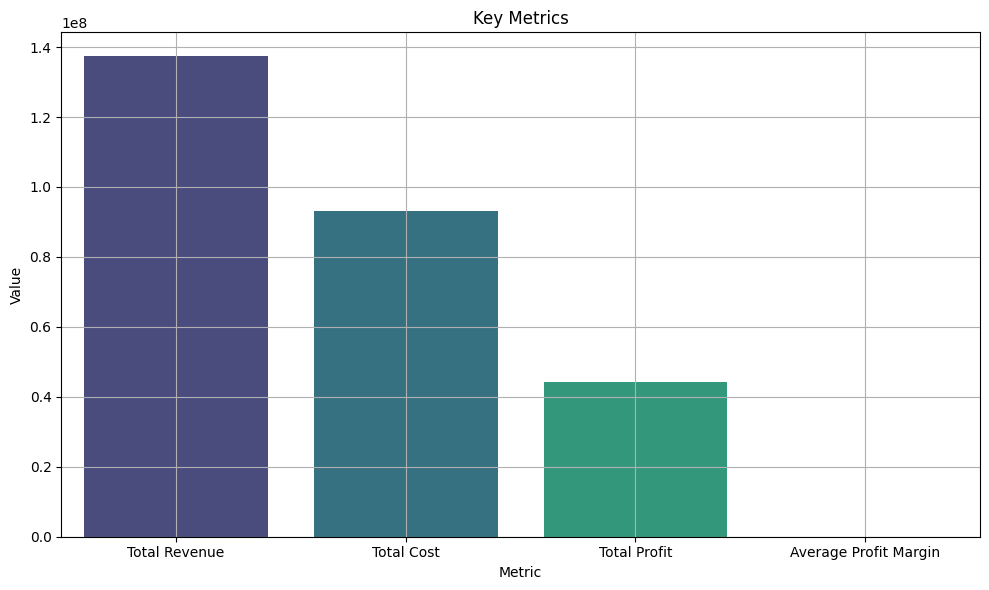

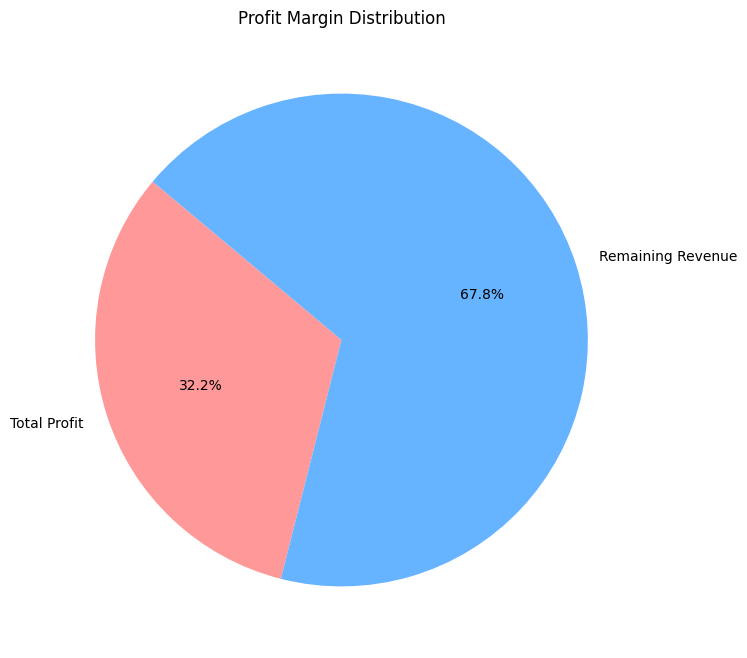

In [7]:
# Key Metrics Bar Chart
plt.figure(figsize=(10, 6))
metrics_labels = list(key_metrics.keys())
metrics_values = list(key_metrics.values())
sns.barplot(x=metrics_labels, y=metrics_values, palette='viridis')
plt.title('Key Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

# Profit Margin Pie Chart
plt.figure(figsize=(8, 8))
sizes = [key_metrics['Total Profit'], key_metrics['Total Revenue'] - key_metrics['Total Profit']]
labels = ['Total Profit', 'Remaining Revenue']
colors = ['#ff9999','#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Profit Margin Distribution')
plt.show()
